In [12]:
#!/usr/bin/env python3

import sys
import torch
from torchvision import transforms
from PIL import Image
from pprint import pprint
from matplotlib import pyplot as plt
from lib.utils import Config, load_model, saitama
import albumentations as A
import numpy as np
import pandas as pd
from lib.dataset import Dataset

In [13]:
config_file = "./conf/efficientnet-400.json"
config = Config.load_json(config_file)    
config.model.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # Use 1st GPU    
# image_path = "../input/processed/test/現生サンプル_コムギ_繊維_48.jpg"
# image_path = "../input/processed/test/現生サンプル_イネ_粘土＋礫_47.tif"
# image_path = "../input/processed/test/現生サンプル_カラスザンショウ_繊維_46.jpg"
image_path = "../input/processed/test/現生サンプル_イネ_繊維_50.tif"
# datasets_csv = "../input/processed/test.csv"
datasets_csv = config.datasets.test.csv
df = pd.read_csv(datasets_csv)
test_images = df.path.values.tolist()



In [14]:
dd = df.groupby('class_num').head(3)

In [15]:
dd

path  class_num      class
0        ../input/processed/test/現生サンプル_イネ_繊維_50.tif          1         イネ
1   ../input/processed/test/現生サンプル_カラスザンショウ_粘土のみ...          4  カラスザンショウ
2        ../input/processed/test/現生サンプル_イネ_繊維_46.tif          1         イネ
3    ../input/processed/test/現生サンプル_コムギ_粘土＋礫_49.tif          6       コムギ
4    ../input/processed/test/現生サンプル_コムギ_粘土＋礫_48.tif          6       コムギ
5        ../input/processed/test/現生サンプル_イネ_繊維_47.tif          1         イネ
6   ../input/processed/test/現生サンプル_カラスザンショウ_粘土のみ...          4  カラスザンショウ
8      ../input/processed/test/現生サンプル_エゴマ_繊維_50.tif          2       エゴマ
9   ../input/processed/test/現生サンプル_コクゾウムシ_粘土＋礫_5...          5    コクゾウムシ
10     ../input/processed/test/現生サンプル_アワ_粘土のみ_48.tif          0         アワ
11   ../input/processed/test/現生サンプル_エゴマ_粘土のみ_50.tif          2       エゴマ
12  ../input/processed/test/現生サンプル_オオムギ_粘土＋礫_49.tif          3      オオムギ
13  ../input/processed/test/現生サンプル_オオムギ_粘土＋礫_48.tif          3      オオムギ
14  ../input/processed/test/現生サンプル_カラスザンショウ_繊維_5...          4  カラスザンショウ
15     ../input/processed/test/現生サンプル_アワ_粘土のみ_49.tif          0         アワ
16  ../input/processed/test/現生サンプル_コクゾウムシ_粘土＋礫_5...          5    コクゾウムシ
18     ../input/processed/test/現生サンプル_エゴマ_繊維_47.tif          2       エゴマ
23  ../input/processed/test/現生サンプル_コクゾウムシ_粘土＋礫_4...          5    コクゾウムシ
25    ../input/processed/test/現生サンプル_オオムギ_繊維_50.jpg          3      オオムギ
26   ../input/processed/test/現生サンプル_コムギ_粘土のみ_48.tif          6       コムギ
34     ../input/processed/test/現生サンプル_アワ_粘土＋礫_49.tif          0         アワ

In [16]:
conf = config
device = conf.model.device     
model = load_model(conf)
model.eval()

IMAGE_SIZE = conf.model.size[0]

# Open the image file

In [17]:
results = []
for idx,(path,class_num,classe) in dd.iterrows():
    orig_im, xai_im, pred = saitama(model,conf,path)
    results.append((orig_im, xai_im, class_num, pred))


Output index tensor(3)
Output index tensor(4)
Output index tensor(1)
Output index tensor(6)
Output index tensor(6)
Output index tensor(1)
Output index tensor(4)
Output index tensor(4)
Output index tensor(5)
Output index tensor(0)
Output index tensor(2)
Output index tensor(3)
Output index tensor(3)
Output index tensor(4)
Output index tensor(0)
Output index tensor(5)
Output index tensor(2)
Output index tensor(5)
Output index tensor(3)
Output index tensor(6)
Output index tensor(5)


In [18]:
len(results)

21

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.classes_ = np.load(conf.datasets.label_encoder)

In [33]:
translation_dictionary = {}
translation_dictionary["イネ"] = "rice"
translation_dictionary["コクゾウムシ"] = "maize wheevil"
translation_dictionary["カラスザンショウ"] = "ailanthoides"
translation_dictionary["オオムギ"] = "barley"
translation_dictionary["アワ"] = "millet"
translation_dictionary["エゴマ"] = "perilla"
translation_dictionary["コムギ"] = "wheat"

In [21]:
le.inverse_transform([1])[0]

'イネ'

In [22]:
translation_dictionary[le.inverse_transform([1])[0]]

'rice'

In [23]:
le.inverse_transform([results[0][2]])[0]

'イネ'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

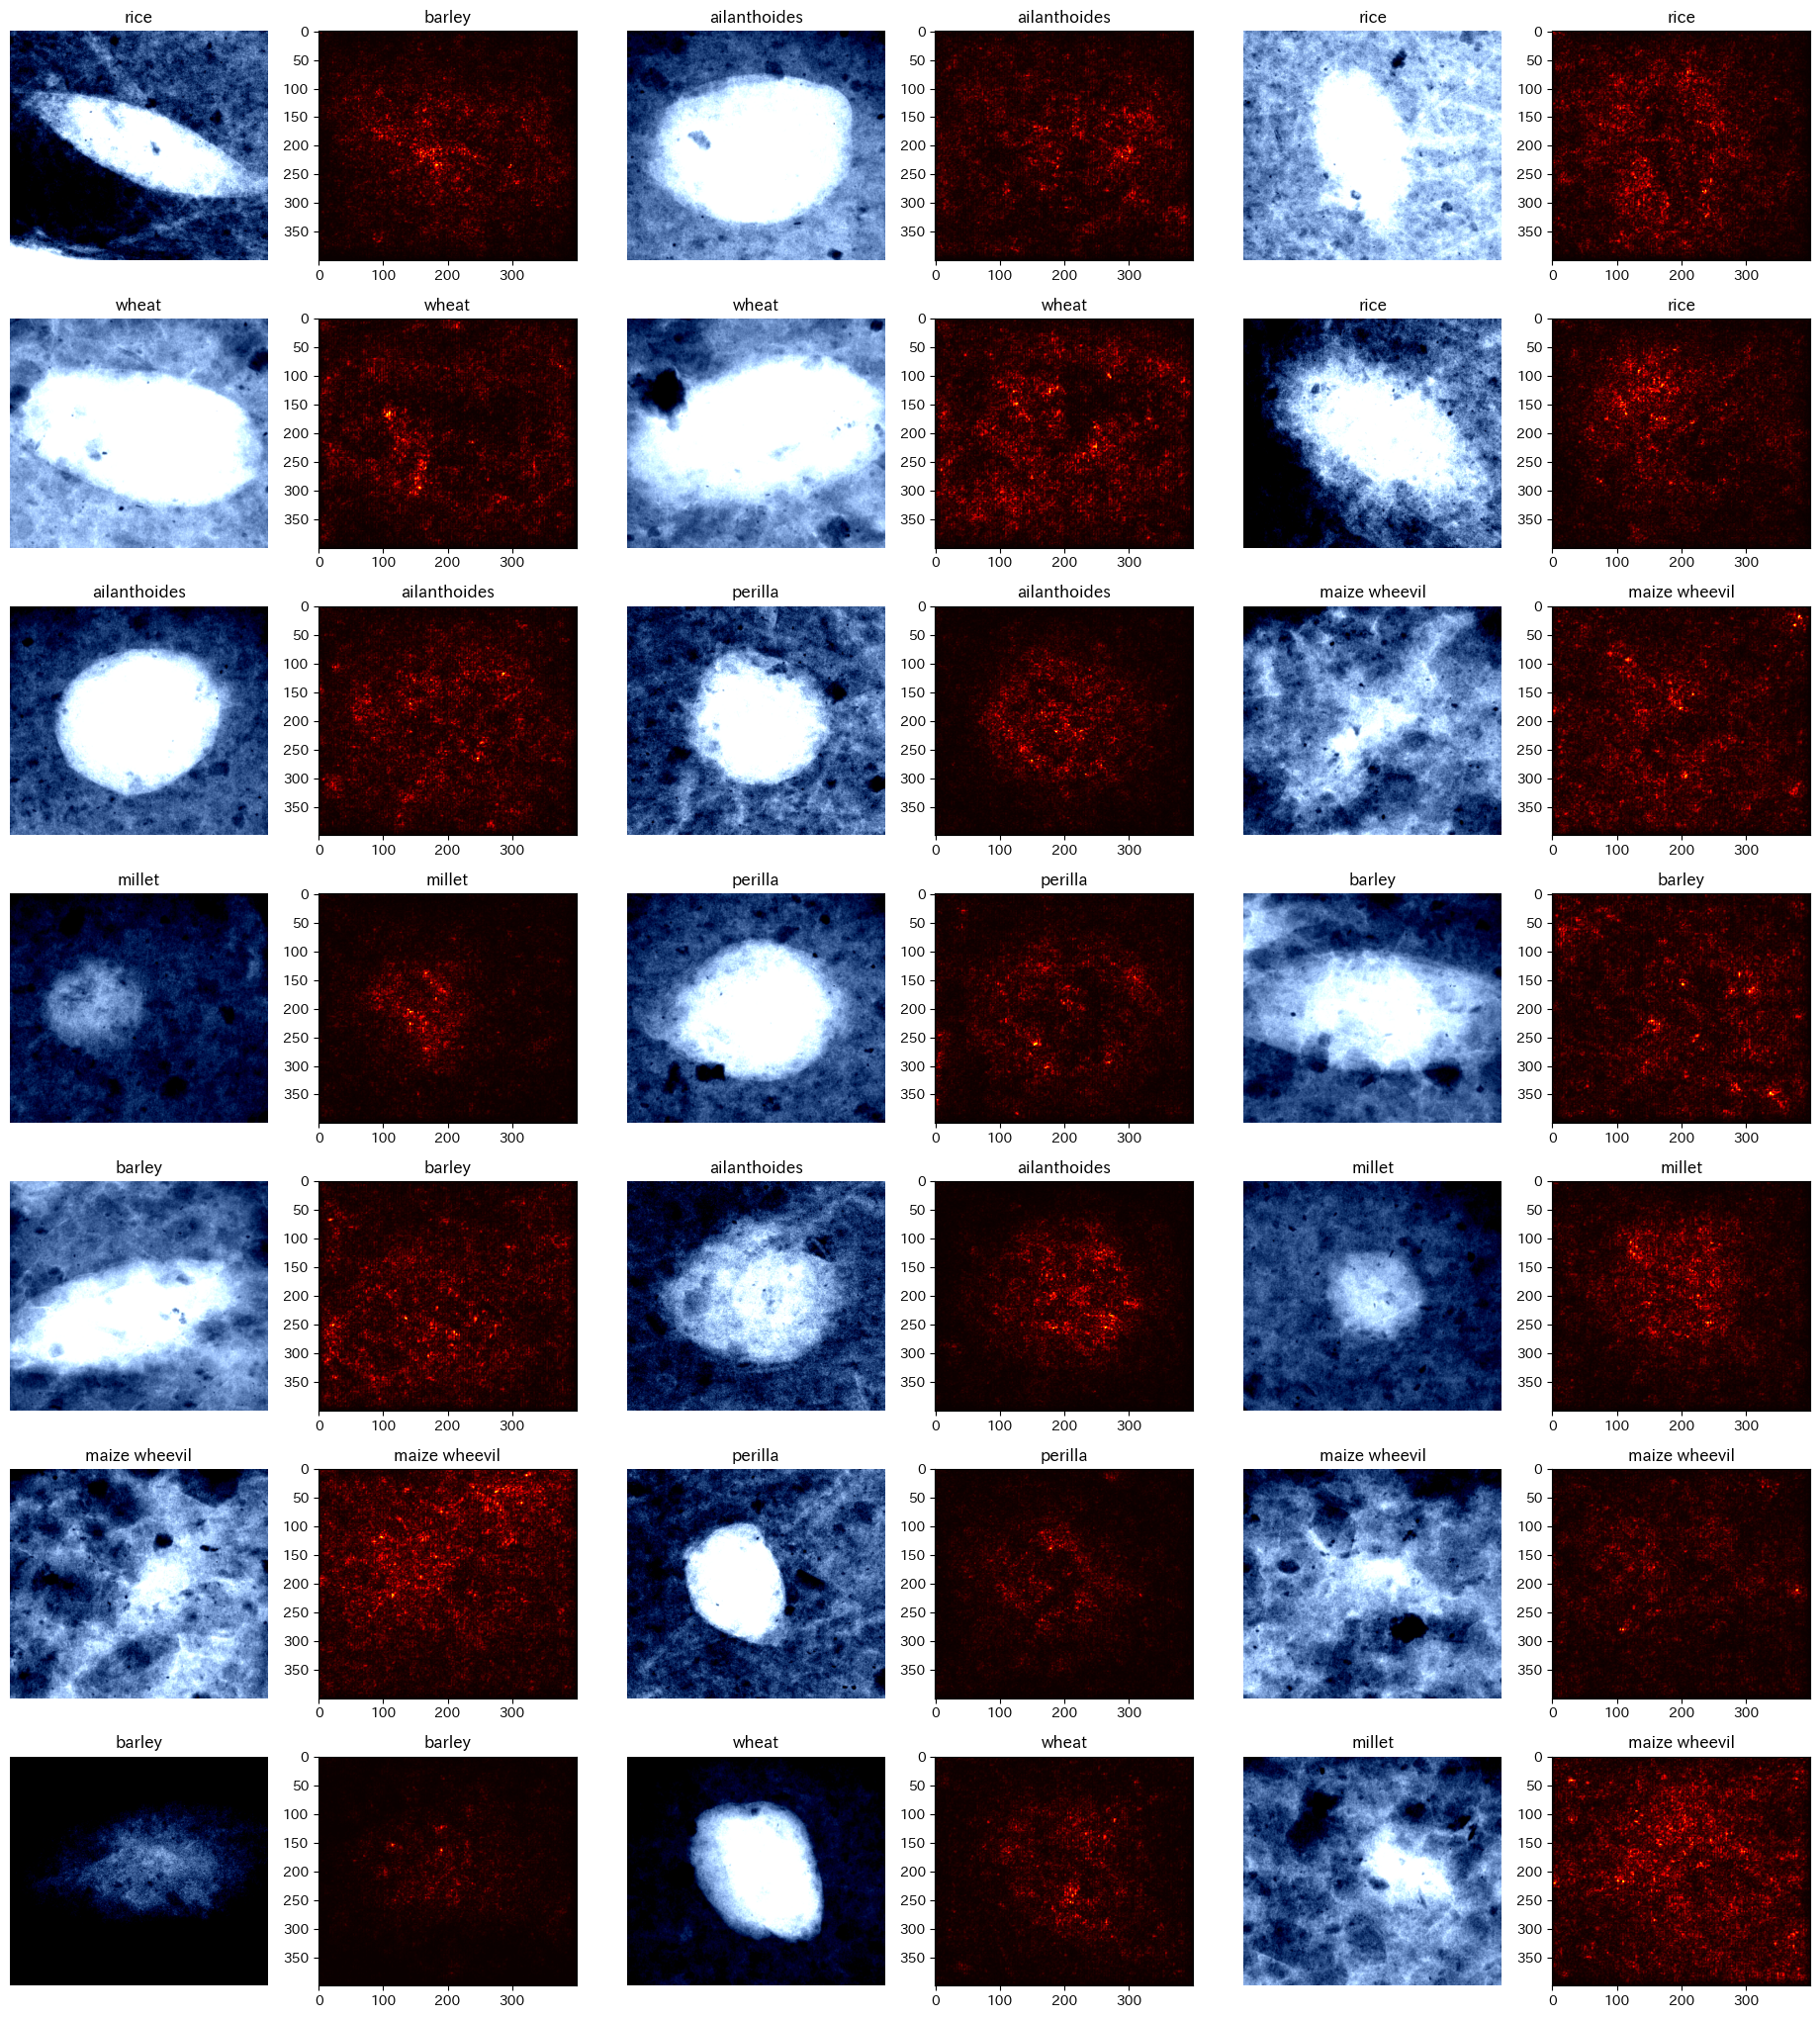

In [34]:
import japanize_matplotlib
INDEX = 0
ROWS = 7
COLUMNS = 3
# Visualize the image and the saliency map
fig, ax = plt.subplots(ROWS, COLUMNS*2)
fig.set_size_inches(18.5, 20.5)

# ax[0].imshow(image.cpu().detach().numpy().transpose(1, 2, 0))
for i in range(0,ROWS):
    for j in range(0,COLUMNS):
        idx = 2 * j
        ax[i][idx].imshow(results[INDEX][0], aspect='auto')
        ax[i][idx].axis('off')
        # ax[i][idx].set_title(le.inverse_transform([results[INDEX][2]])[0])
        ax[i][idx].set_title(translation_dictionary[le.inverse_transform([results[INDEX][2]])[0]])
        ax[i][idx+1].imshow(results[INDEX][1].cpu(), cmap='hot', aspect='auto')
        ax[i][idx*1].axis('off')
        # ax[i][idx+1].set_title(le.inverse_transform([results[INDEX][3]])[0])
        ax[i][idx+1].set_title(translation_dictionary[le.inverse_transform([results[INDEX][3]])[0]])
        INDEX += 1
# ax[0][0].imshow(results[INDEX][0])
# ax[0][0].axis('off')
# ax[0][1].imshow(results[INDEX][1].cpu(), cmap='hot')
# ax[0][1].axis('off')

# ax[1][0].imshow(results[INDEX+1][0])
# ax[1][0].axis('off')
# ax[1][1].imshow(results[INDEX+1][1].cpu(), cmap='hot')
# ax[1][1].axis('off')

plt.tight_layout()
# fig.suptitle('The Image and Its Saliency Map')
# plt.draw()
plt.show()    

In [35]:
output_file = "../figures/saliency.png"
fig.savefig(output_file)

In [5]:
test_targets = np.zeros(len(test_images), dtype=np.int_)

test_aug = A.Compose(
    [
        A.SmallestMaxSize(conf.model.size),
        A.CenterCrop(conf.model.size[0], conf.model.size[1]),
        A.augmentations.transforms.Normalize()
    ]
)

test_dataset = Dataset(
    image_paths=test_images,
    targets=test_targets,
    augmentations=test_aug,
    channel_first=True,
    torgb=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=conf.DataLoader.batch_size,
    shuffle=False,
    num_workers=conf.DataLoader.num_workers
)

/Users/israelzinc/Library/Python/3.9/lib/python/site-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 11 worker processes in total. Our suggested max number of worker in current system is 8 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [6]:
from lib import engine
preds = engine.salient(model, test_loader, device)

100%|██████████| 2/2 [00:28<00:00, 14.07s/it]


In [11]:
preds[0][0]

tensor([-2.1927,  5.1141, -4.2793,  5.5239, -3.2139, -2.5459, -0.9913],
       grad_fn=<SelectBackward0>)

In [23]:
example = next(iter(test_loader))


In [25]:
example["image"][0]

tensor([[[-0.0287, -0.1314, -0.0458,  ..., -0.1486,  0.0741,  0.0912],
         [-0.1314, -0.1657,  0.0056,  ...,  0.0056,  0.0912,  0.1426],
         [-0.0287, -0.0458, -0.0629,  ...,  0.2796,  0.1597,  0.1768],
         ...,
         [ 2.2489,  2.2489,  2.2489,  ...,  0.2111,  0.1083,  0.1083],
         [ 2.2489,  2.2489,  2.2489,  ...,  0.1083,  0.0912,  0.1083],
         [ 2.2489,  2.2489,  2.2489,  ...,  0.1254,  0.2282,  0.1426]],

        [[ 0.1001, -0.0049,  0.0826,  ..., -0.0224,  0.2052,  0.2227],
         [-0.0049, -0.0399,  0.1352,  ...,  0.1352,  0.2227,  0.2752],
         [ 0.1001,  0.0826,  0.0651,  ...,  0.4153,  0.2927,  0.3102],
         ...,
         [ 2.4286,  2.4286,  2.4286,  ...,  0.3452,  0.2402,  0.2402],
         [ 2.4286,  2.4286,  2.4286,  ...,  0.2402,  0.2227,  0.2402],
         [ 2.4286,  2.4286,  2.4286,  ...,  0.2577,  0.3627,  0.2752]],

        [[ 0.3219,  0.2173,  0.3045,  ...,  0.1999,  0.4265,  0.4439],
         [ 0.2173,  0.1825,  0.3568,  ...,  0

In [32]:
image = example["image"][0][0][0]
image = image.cpu()

In [33]:
output = preds[0][0]
output_idx = output.argmax()
output_max = output[0, output_idx]

print("Output index",output_idx)

# Do backpropagation to get the derivative of the output based on the image
output_max.backward()

# Retireve the saliency map and also pick the maximum value from channels on each pixel.
# In this case, we look at dim=1. Recall the shape (batch_size, channel, width, height)
saliency, _ = torch.max(image.grad.data.abs(), dim=1) 
saliency = saliency.reshape(IMAGE_SIZE, IMAGE_SIZE)

# Reshape the image
image = image.reshape(-1, IMAGE_SIZE, IMAGE_SIZE)

IndexError: too many indices for tensor of dimension 1

In [10]:
image = Image.open(image_path)

# Set up the transformations
# transform_ = transforms.Compose([
#         transforms.Resize(IMAGE_SIZE),
#         transforms.CenterCrop(IMAGE_SIZE),            
#         transforms.ToTensor(),
# ])

image = np.array(image)
test_aug = A.Compose(
        [
            A.SmallestMaxSize(conf.model.size),
            A.CenterCrop(conf.model.size[0], conf.model.size[1]),
            A.augmentations.transforms.Normalize()
        ]
    )
augmented = test_aug(image=image)
image = augmented["image"]
orig_image = image
# # Transforms the image
# image = transform_(image)

# Reshape the image (because the model use 
# 4-dimensional tensor (batch_size, channel, width, height))
image = image.reshape(1, 3, IMAGE_SIZE, IMAGE_SIZE)

# Set the device for the image
image = torch.tensor(image)
image = image.to(device)

# Set the requires_grad_ to the image for retrieving gradients
image.requires_grad_()

# Retrieve output from the image
output, _ = model(image)

# print("OUTPUTTTT", output)

# # Catch the output
output_idx = output.argmax()
output_max = output[0, output_idx]

print("Output index",output_idx)

# Do backpropagation to get the derivative of the output based on the image
output_max.backward()

# Retireve the saliency map and also pick the maximum value from channels on each pixel.
# In this case, we look at dim=1. Recall the shape (batch_size, channel, width, height)
saliency, _ = torch.max(image.grad.data.abs(), dim=1) 
saliency = saliency.reshape(IMAGE_SIZE, IMAGE_SIZE)

# Reshape the image
image = image.reshape(-1, IMAGE_SIZE, IMAGE_SIZE)



Output index tensor(1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


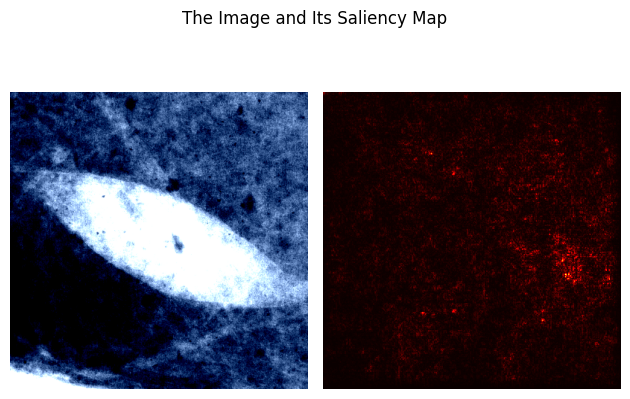

In [11]:
# Visualize the image and the saliency map
fig, ax = plt.subplots(1, 2)
# ax[0].imshow(image.cpu().detach().numpy().transpose(1, 2, 0))
ax[0].imshow(orig_image)
ax[0].axis('off')
ax[1].imshow(saliency.cpu(), cmap='hot')
ax[1].axis('off')
plt.tight_layout()
fig.suptitle('The Image and Its Saliency Map')
# plt.draw()
plt.show()    